In [3]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]
Numpy: 1.17.2
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.21.3


In [30]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Loading the dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 
         'uniform_cell_shape', 'marginal_adhesive',
         'single_epithelial_size', 'bare_nuclei', 
         'bland_chromatin', 'normal_nucleoli', 'mitoses','class']
df = pd.read_csv(url, names = names)

In [8]:
# preprocessing the data

df.replace('?', -99999, inplace = True)
print(df.axes)

df.drop(['id'], 1, inplace = True)

# Print the shape of the dataset

print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesive', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [13]:
# Do dataset visualizations

print(df.loc[78])
print(df.describe())

clump_thickness           3
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesive         1
single_epithelial_size    2
bare_nuclei               3
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 78, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesive  single_epithelial_size  bland_chromatin  \
count         699.000000              699

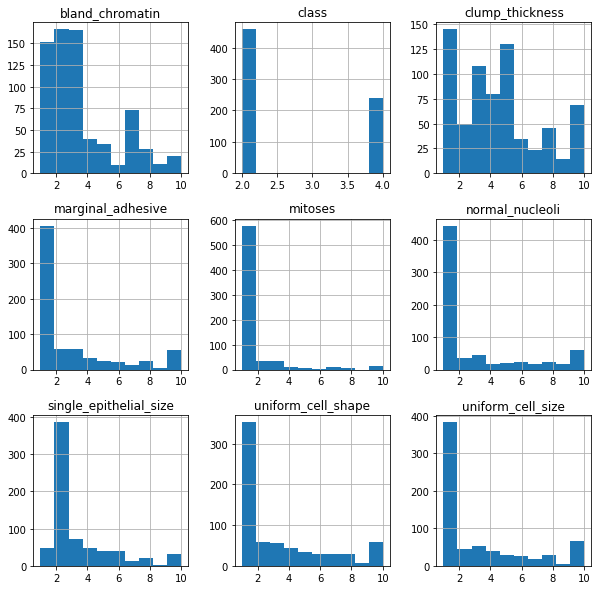

In [14]:
df.hist(figsize = (10, 10))
plt.show()

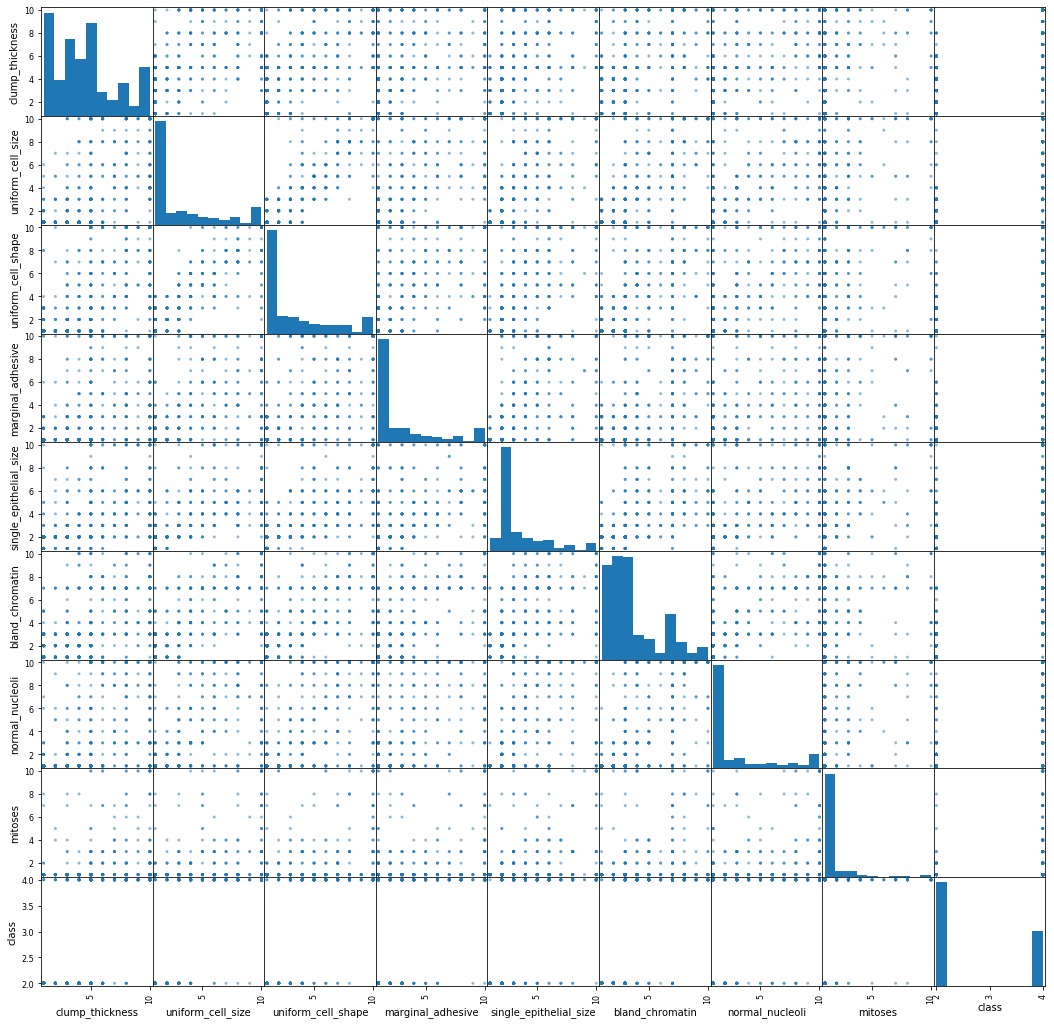

In [16]:
# Create scatter plot matrix

scatter_matrix(df, figsize = (18, 18))
plt.show()

In [40]:
# Create X and Y datasets for training
X  = np.array(df.drop(['class'], 1))
y  = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
seed = 8
scoring = 'accuracy'

In [42]:
# Define the models to train

models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', svm.SVC()))

# Evaluate each model in turn

results = []
names = []

for name, model in models: 
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train , cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.973182 (0.016446)
SVM: 0.958864 (0.029923)


/home/kandpal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kandpal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kandpal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kandpal/anaconda3/lib/python3.6/site-packages/

In [43]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       102
           4       0.95      0.95      0.95        38

    accuracy                           0.97       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.97      0.97      0.97       140

SVM
0.9571428571428572
              precision    recall  f1-score   support

           2       0.99      0.95      0.97       102
           4       0.88      0.97      0.93        38

    accuracy                           0.96       140
   macro avg       0.94      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



/home/kandpal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [53]:
clf = svm.SVC()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,5]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.9571428571428572
[4]


/home/kandpal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
